In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from numpy import linalg as LA
import math
import os
from collections import defaultdict

# Problem 1

# Given a set of images of any single digit from the above dataset, compute a covariance matrix and the Eigen vector basis using the vectorized representation of these images. Project each image onto this PCA space using i) all Eigen vectors ii) Selected Eigen vectors with different values of energy thresholds (computed using the top k Eigen values). Reconstruct the original images using the projected data obtained in the cases above and comment on the quality of reconstruction based for different cases.

In [2]:
train = pd.read_csv('C:/Users/MANVENDRA/Desktop/study material/pattern assignments/Assignment 3/train.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
index1=(train[train['label']==5]).index.tolist()
var=train.loc[train.index.isin(index1)]
new=var.drop('label',axis=1)
temp=new
index=new.index.tolist()
new.shape

(3795, 784)

In [5]:
means=new.mean(0)
new=np.array(new)
for i in range (3795):
    new[i,:]=new[i,:]-means
cmat=np.dot((new.T),new)
evals,evec=np.linalg.eigh(cmat)

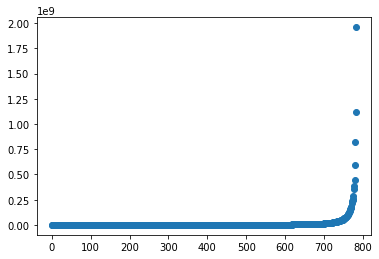

In [6]:
xx=np.arange(0,784)
plt.scatter(xx,evals)

In [12]:
basis=evec[:,700:]
y=np.dot(new,(basis))
res=np.dot(y,(basis.T))
for i in range (3795):
    res[i,:]=res[i,:]+means
print(res)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0.5, 1.0, 'Reconstructed image')

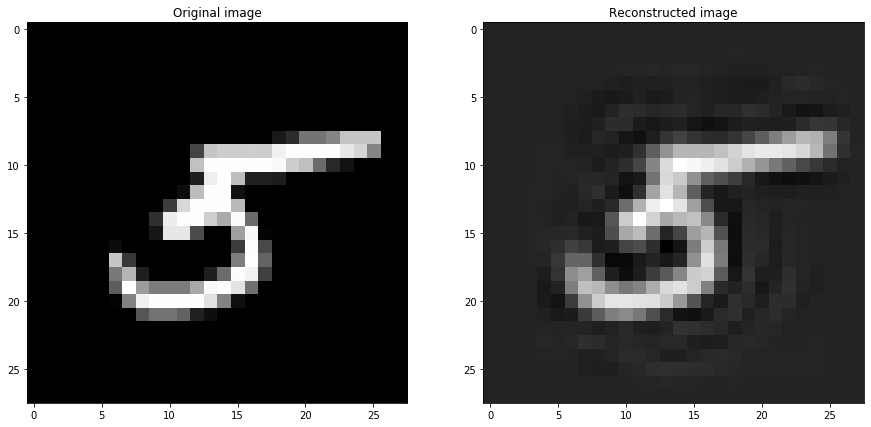

In [13]:
img1=res[4,:]
figure=plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
temp=np.array(temp)
img2=temp[4,:]
img2=img2.reshape(28,28)
plt.imshow(img2,cmap='gray')
plt.title('Original image')
plt.subplot(1,2,2)
img1=img1.reshape(28,28)
plt.imshow(img1,cmap='gray')
plt.title('Reconstructed image')

# Problem 2

# Now add up to 20% noise to the images, and perform the same experiment as above. Comment on the tradeoff between denoising and reconstruction quality for different cases of no. of principal components

In [9]:
#Generation of noisy image
noise=[]
for i in range(len(new)):
    new1=new[i,:]
    noisy_img = new1 + np.random.normal(0, 10, new1.shape)
    noisy_img=list(noisy_img)
    noise.extend(noisy_img)
a = np.array(noise).reshape(3795,784)

# Applying same procedure with previous basis

In [10]:
y=np.dot(a,(basis))
res=np.dot(y,(basis.T))
for i in range (3795):
    res[i,:]=res[i,:]+means
print(res)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0.5, 1.0, 'Reconstructed image')

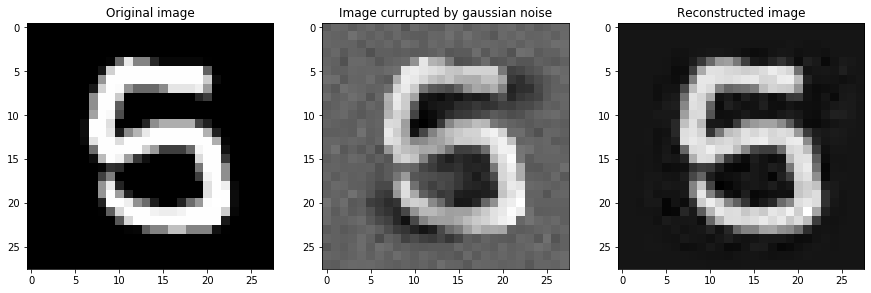

In [11]:
figure=plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
img2=temp[2,:]
img2=img2.reshape(28,28)
plt.imshow(img2,cmap='gray')
plt.title('Original image')
plt.subplot(1,3,2)
x=a[2,:]
x=x.reshape(28,28)
plt.imshow(x,cmap='gray')
plt.title('Image currupted by gaussian noise')
res1=res[2,:]
res1=res1.reshape(28,28)
plt.subplot(1,3,3),plt.imshow(res1,cmap='gray')
plt.title('Reconstructed image')
